# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from category_encoders import TargetEncoder

from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from mlxtend.plotting import plot_confusion_matrix

# Helper Function

In [2]:
def regressionSummary(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [54]:
def modelEvaluate(estimator, X_test, y_test):
    
    print(f'Model Fitting Result:\n')
    
    print(f'Best parameters: {estimator.best_params_}')
    
    print(f'Training accuracy: {estimator.score(X_dev, y_dev):0.4f}')

    print(f'Testing accuracy: {estimator.score(X_test, y_test):0.4f}')

    print(f'Testing precision: {precision_score(estimator.predict(X_test), y_test):0.4f}')

    print(f'Testing recall: {recall_score(estimator.predict(X_test), y_test):0.4f}')

    print('Confusion matrix:')
    cm = confusion_matrix(y_test, estimator.predict(X_test))
    plot_confusion_matrix(cm);

# Import Data

In [4]:
df_ori = pd.read_csv('Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Data Preprocessing

## Dataset Overview

In [5]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Data Integrity Checks

In [6]:
# check for duplicates
df_ori.duplicated().sum()

0

In [7]:
# check for missing values
pd.DataFrame({
    'Missing Count': df_ori.isna().sum(),
    'Missing %': (df_ori.isna().sum() / df_ori.shape[0] * 100).round(2)
})

,Missing Count,Missing %
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


# Data Preprocessing

In [8]:
# nominal and datetime columns to drop
cols_to_drop = [
    'StandardHours', 
    'EmployeeCount', 
    'Over18',
    'EmployeeNumber'
]

df = df_ori.drop(columns=cols_to_drop)

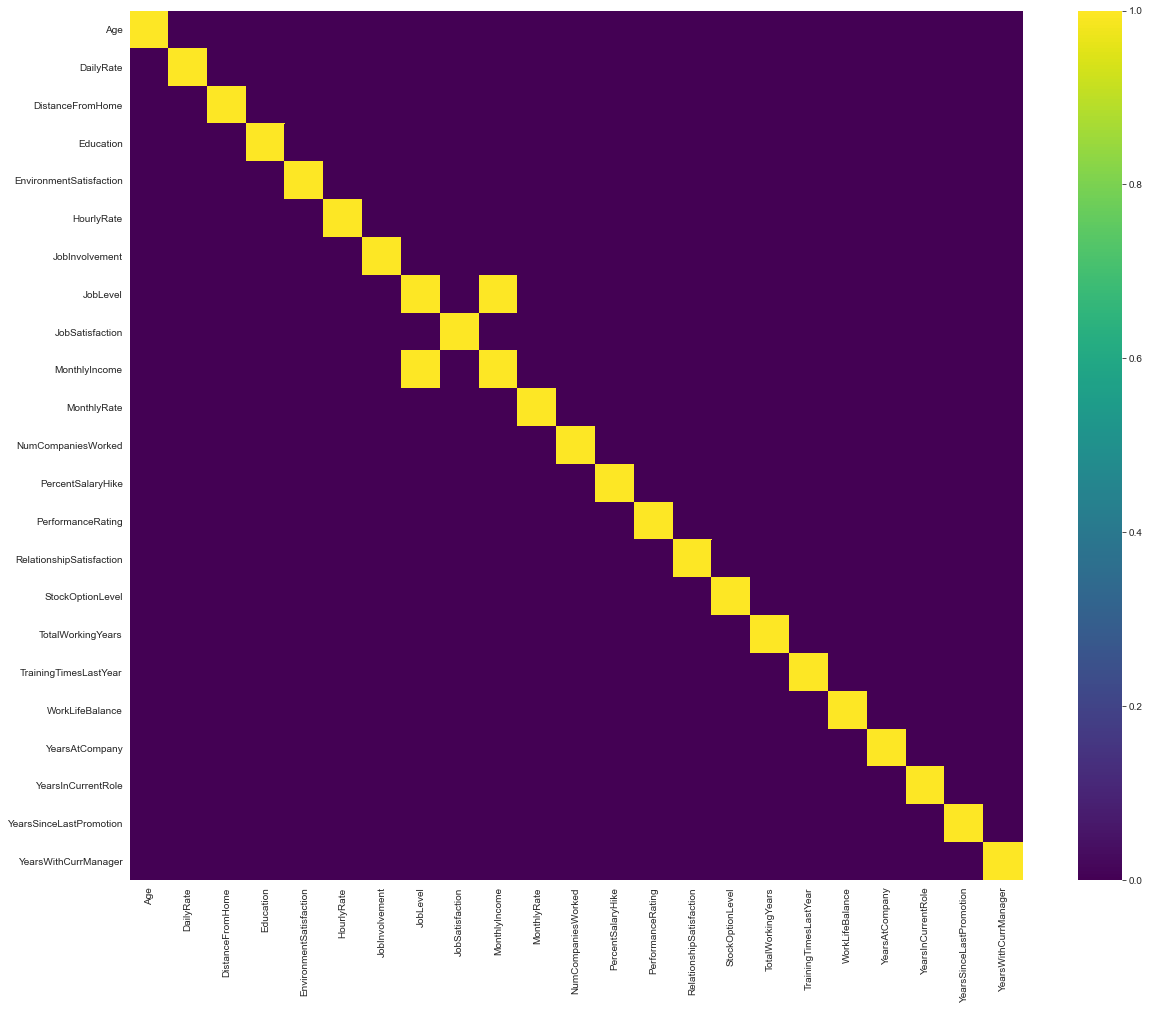

In [9]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(abs(corr_matrix) > 0.8, cmap='viridis');

In [10]:
# drop columns with high correlation with the other column
df.drop(columns=['JobLevel'], inplace=True)

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.728571,6502.931293,14313.103401,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.102846,4707.956783,7117.786044,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,2094.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,2911.000000,8047.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,3.000000,4919.000000,14235.500000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,4.000000,8379.000000,20461.500000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,26999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
# create a list of our conditions
conditions = [
    (df.Attrition == 'No'),
    (df.Attrition == 'Yes')
]

# create a list of the values we want to assign for each condition
values = [0, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df.Attrition = np.select(conditions, values)

In [14]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [15]:
# # create a list of our conditions
# conditions = [
#     (df.BusinessTravel == 'Non-Travel'),
#     (df.BusinessTravel == 'Travel_Rarely'),
#     (df.BusinessTravel == 'Travel_Frequently')
# ]

# # create a list of the values we want to assign for each condition
# values = [0, 1, 2]

# # create a new column and use np.select to assign values to it using our lists as arguments
# df.BusinessTravel = np.select(conditions, values)

In [16]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [17]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [18]:
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [19]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [20]:
df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [21]:
df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [22]:
# # create a list of our conditions
# conditions = [
#     (df.OverTime == 'No'),
#     (df.OverTime == 'Yes')
# ]

# # create a list of the values we want to assign for each condition
# values = [0, 1]

# # create a new column and use np.select to assign values to it using our lists as arguments
# df.OverTime = np.select(conditions, values)

In [23]:
df[['Attrition', 'Gender']].value_counts()

Attrition  Gender
0          Male      732
           Female    501
1          Male      150
           Female     87
dtype: int64

# Train Test Split

- create X feature matrix and y target label

In [24]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

- check distribution of target label

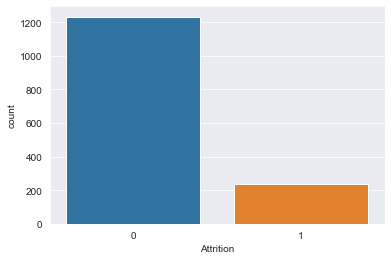

In [25]:
sns.countplot(x=y);

- use stratified split for a imbalanced dataset

In [26]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

- specify column subsets

In [27]:
features_categoric = [
    'BusinessTravel',
    'OverTime',
    'Department', 
    'EducationField', 
    'Gender', 
    'JobRole', 
    'MaritalStatus'
]

features_numeric = [
    'Age',
    'DailyRate',
    'DistanceFromHome',
    'Education',
    'EnvironmentSatisfaction',
    'HourlyRate',
    'JobInvolvement',
    'JobSatisfaction',
    'MonthlyIncome',
    'MonthlyRate',
    'NumCompaniesWorked',
    'PercentSalaryHike',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'WorkLifeBalance',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

# Logistic Regression

In [28]:
preprocess_lr = ColumnTransformer(
    transformers=[('targetencoder', TargetEncoder(), features_categoric),
                  ('minmaxscaler', MinMaxScaler(), features_numeric)], 
    n_jobs=-1
)

- classifier pipeline

In [37]:
pipe_lr = Pipeline(
    steps=[('preprocess', preprocess_lr),
           ('lr', LogisticRegression(max_iter=10000, solver='saga'))
])

- hyperparameter tuning

In [38]:
%%time
param_lr = {
    'lr__penalty': ['l1', 'l2','none']
}

gscv_lr = GridSearchCV(
    pipe_lr, 
    param_lr, 
    scoring='accuracy',
    cv=5, 
    n_jobs=-1
).fit(X_dev, y_dev)

Wall time: 3.29 s


In [39]:
gscv_lr.best_params_

{'lr__penalty': 'none'}

In [41]:
print(f'train accuracy: {gscv_lr.score(X_dev, y_dev):0.4f}')

train accuracy: 0.8921


Model Fitting Result:

Best parameters: {'lr__penalty': 'none'}
Training accuracy: 0.8921
Testing accuracy: 0.8844
Testing precision: 0.4507
Testing recall: 0.7273
Confusion matrix:


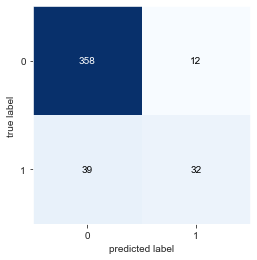

In [55]:
modelEvaluate(gscv_lr, X_test, y_test)

In [52]:
print(classification_report(y_test, gscv_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       370
           1       0.73      0.45      0.56        71

    accuracy                           0.88       441
   macro avg       0.81      0.71      0.75       441
weighted avg       0.87      0.88      0.87       441



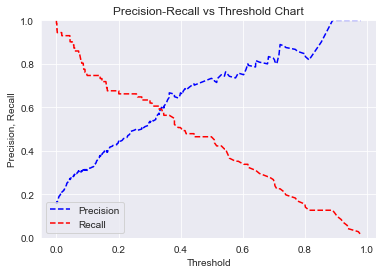

In [53]:
pred_y=gscv_lr.predict(X_test) 

probs_y=gscv_lr.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1]);

# Random Forest

- encoding and scaling pipeline

In [35]:
preprocess_rf = ColumnTransformer(
    transformers=[('targetencoder', TargetEncoder(), features_categoric),
                  ('standardscaler', StandardScaler(), features_numeric)], 
    n_jobs=-1
)

- classifier pipeline

In [36]:
pipe_rf = Pipeline(
    steps=[('preprocess', preprocess_rf),
           ('rf', RandomForestClassifier(n_jobs=-1, random_state=42, warm_start=True))
])

- hyperparameter tuning

In [37]:
%%time
params_rf = {
    'rf__n_estimators': [1, 2, 3],
    'rf__max_depth': [1, 2, 3]
}

gscv_rf = GridSearchCV(
    pipe_rf, 
    params_rf, 
    scoring='roc_auc',
    cv=5, 
    n_jobs=-1
).fit(X_dev, y_dev)

Wall time: 2.48 s


In [38]:
gscv_rf.best_params_

{'rf__max_depth': 1, 'rf__n_estimators': 1}

In [39]:
print(f'train accuracy: {gscv_rf.score(X_dev, y_dev)}')

train accuracy: 1.0


In [40]:
print(f'test accuracy: {gscv_rf.score(X_test, y_test)}')

test accuracy: 1.0


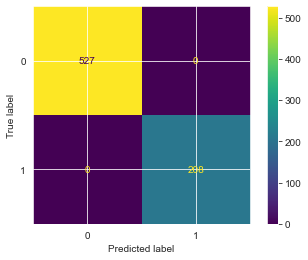

In [41]:
ConfusionMatrixDisplay.from_estimator(gscv_rf.best_estimator_, X_test, y_test);

# K-Nearest Neighbor

In [129]:
preprocess_knn = ColumnTransformer(
    transformers=[('targetencoder', TargetEncoder(), features_categoric),
                  ('standardscaler', StandardScaler(), features_numeric)], 
    n_jobs=-1
)

- classifier pipeline

In [130]:
pipe_knn = Pipeline(
    steps=[('preprocess', preprocess_knn),
           ('knn', KNeighborsClassifier(n_jobs=-1))
])

- hyperparameter tuning

In [131]:
%%time
param_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11]
}

gscv_knn = GridSearchCV(
    pipe_knn, 
    param_knn, 
#     scoring='roc_auc',
    cv=5, 
    n_jobs=-1
).fit(X_dev, y_dev)

Wall time: 672 ms


In [132]:
gscv_knn.best_params_

{'knn__n_neighbors': 11}

In [133]:
print(f'train accuracy: {gscv_knn.score(X_dev, y_dev)}')

train accuracy: 0.7238095238095238


In [134]:
print(f'train accuracy: {gscv_knn.score(X_test, y_test)}')

train accuracy: 0.6965986394557823
